## Install and Updated Required Libraries

In [4]:
### Update sklearn to prevent version mismatches
# !pip install sklearn --upgrade

In [6]:
### install joblib. This will be used to save your model. 
### Restart your kernel after installing 
# !pip install joblib

In [1]:
import pandas as pd
import numpy as np

## Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv('../data/monthly_summary_v2.csv')
df = df.dropna(axis=0, how='all')
df = df.drop('index', axis=1)
print(df.shape)
df.head()

(47, 15)


,month,tweets,isRetweet,isDeleted,avg_sentiment_score,sum_sentiment_score,delta_avg,retweets,favorites,word_count,positive,negative,neutral,s&p_%change,s&p_up/down
0,2016-12-01,6,1,0,5.678993,331.40,0.144033,56270,225011,345,4,1,1,0.017571,up
1,2017-01-01,6,0,0,5.533250,434.94,-0.001711,138407,597482,454,3,0,3,0.012125,up
2,2017-02-01,9,0,0,5.355419,638.54,-0.179541,191814,894968,688,4,2,3,0.034149,up
3,2017-03-01,10,0,1,5.500236,620.86,-0.034724,158872,722048,656,5,0,5,-0.007315,down
4,2017-04-01,10,1,0,5.151696,618.00,-0.383264,108465,466597,693,0,3,7,0.009253,up


## Select Your Features and Label (X and y values)

In [4]:
# Set features. This will also be used as your x values.
# Select the features you would like to use - this is depended on the model you're going to use.
# It might be benefitial to utilize a feature selection model.
selected_features = df.drop(['month', 's&p_up/down', 's&p_%change', 'isRetweet', 'isDeleted', 'negative', 'neutral'], axis=1)
selected_features_all = df.drop(['month', 's&p_up/down', 's&p_%change'], axis=1)

print(selected_features.shape)
selected_features.head()

(47, 8)


,tweets,avg_sentiment_score,sum_sentiment_score,delta_avg,retweets,favorites,word_count,positive
0,6,5.678993,331.40,0.144033,56270,225011,345,4
1,6,5.533250,434.94,-0.001711,138407,597482,454,3
2,9,5.355419,638.54,-0.179541,191814,894968,688,4
3,10,5.500236,620.86,-0.034724,158872,722048,656,5
4,10,5.151696,618.00,-0.383264,108465,466597,693,0


## Create Training And Test Split

In [5]:
# Pull out the output labels column or y values
labels = df['s&p_up/down']
print(labels.shape)
labels.head()

(47,)


0      up
1      up
2      up
3    down
4      up
Name: s&p_up/down, dtype: object

In [6]:
# Use the train_test_split method to categorize your data into training and testing groups
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_features, labels, train_size=.7, random_state=3)
# X_train, X_test, y_train, y_test = train_test_split(selected_features_all, labels, train_size=.7, random_state=3)

In [7]:
# Inspect training data
print(X_train.shape)
X_train.head()

(32, 8)


,tweets,avg_sentiment_score,sum_sentiment_score,delta_avg,retweets,favorites,word_count,positive
46,64,5.470782,5446.21,-0.064179,1633691,6020883,5813,29
15,24,5.422641,2608.50,-0.112319,435907,1929268,2773,11
37,68,5.433572,5398.59,-0.101388,1156719,3847312,5749,27
11,36,5.467930,3264.94,-0.067031,565004,2511010,3488,16
7,24,5.663162,1644.87,0.128201,406119,1695405,1679,16


In [8]:
y_train.shape

(32,)

## Pre-Processing

[0.64444444 0.47203748 0.53856966 0.47203748 0.85884835 0.78367359
 0.54614463 0.66666667]


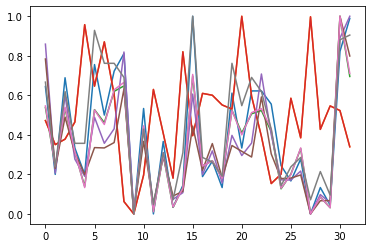

In [9]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# inspect the scaled data to see how the feature values have been scaled
print(X_train_scaled[0])

# Plot the scaled data
import matplotlib.pyplot as plt 
plt.plot(X_train_scaled)

## Train The Model

In [13]:
# Random Forest Classifier model for training
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, bootstrap=True, max_depth=3, min_samples_split=8)
clf = clf.fit(X_train_scaled, y_train)

print(f"Training Data Score: {clf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {clf.score(X_test_scaled, y_test)}")

Training Data Score: 0.90625
Testing Data Score: 0.6666666666666666


In [14]:
# Random Forest Classifier model for training
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, bootstrap= True, max_depth= 10, min_samples_split= 8)
clf = clf.fit(X_train_scaled, y_train)
print(f"Training Data Score: {clf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {clf.score(X_test_scaled, y_test)}")

Training Data Score: 0.90625
Testing Data Score: 0.6666666666666666


In [37]:
# Random Forest Classifier model for training
# All features
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, bootstrap=True, max_depth=3, min_samples_split=8)
clf = clf.fit(X_train_scaled, y_train)

print(f"Training Data Score: {clf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {clf.score(X_test_scaled, y_test)}")

Training Data Score: 0.6643026004728132
Testing Data Score: 0.6263736263736264


## Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [14]:
# Create the GridSearchCV model
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid={'bootstrap': [True], 'n_estimators' : [10, 50, 100, 200],
'min_samples_split' : range(8, 10, 20),'max_depth': [3, 10, 20, 40]}
grid = GridSearchCV(clf, param_grid, verbose=3)

# To get list of parameters you can tune
clf.get_params().keys()
# grid.fit(X_train_scaled, y_train)

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [15]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=10, score=0.447, total=   0.0s
[CV] bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=10, score=0.518, total=   0.0s
[CV] bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=10, score=0.424, total=   0.0s
[CV] bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=10, score=0.524, total=   0.0s
[CV] bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=10 
[CV]  bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=10, score=0.560, total=   0.0s
[CV] bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=50 
[CV]  b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=50, score=0.471, total=   0.1s
[CV] bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=50 
[CV]  bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=50, score=0.512, total=   0.1s
[CV] bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=50 
[CV]  bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=50, score=0.524, total=   0.1s
[CV] bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=100, score=0.506, total=   0.1s
[CV] bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=100, score=0.494, total=   0.1s
[CV] bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=3, min_samples_split=8, n_estimators=100, score=0.424, total=   0.1s
[CV] bootstrap=True, max_depth=3, 

[CV]  bootstrap=True, max_depth=20, min_samples_split=8, n_estimators=100, score=0.476, total=   0.1s
[CV] bootstrap=True, max_depth=20, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=20, min_samples_split=8, n_estimators=200, score=0.447, total=   0.3s
[CV] bootstrap=True, max_depth=20, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=20, min_samples_split=8, n_estimators=200, score=0.588, total=   0.3s
[CV] bootstrap=True, max_depth=20, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=20, min_samples_split=8, n_estimators=200, score=0.471, total=   0.3s
[CV] bootstrap=True, max_depth=20, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=20, min_samples_split=8, n_estimators=200, score=0.512, total=   0.3s
[CV] bootstrap=True, max_depth=20, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=20, min_samples_split=8, n_estimators=200, score=0.488, total=   0.3s
[CV] bootstrap=Tru

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    9.5s finished


GridSearchCV(estimator=RandomForestClassifier(max_depth=3, min_samples_split=8),
             param_grid={'bootstrap': [True], 'max_depth': [3, 10, 20, 40],
                         'min_samples_split': range(8, 10, 20),
                         'n_estimators': [10, 50, 100, 200]},
             verbose=3)

In [39]:
print(grid.best_params_)
print(grid.best_score_)

{'bootstrap': True, 'max_depth': 3, 'min_samples_split': 8, 'n_estimators': 100}
0.5685329996872067


## Original Model - No Tuning Or Feature Selection
Training Data Score: 0.624113475177305

Testing Data Score: 0.6263736263736264

## Hypertuned and Feature Selection Score

Training Data Score: 0.5858585858585859

Testing Data Score: 0.5268456375838926

## Save The Model

In [ ]:
# import joblib
# filename = 'model_2_randomforest_extratreeclassifer.h5'
# joblib.dump(clf, filename)